## ДИСКРЕТНАЯ МАТЕМАТИКА  <br/>
# Семинар 7<br/>
**Голев Александр 135М**


In [323]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

import random

---
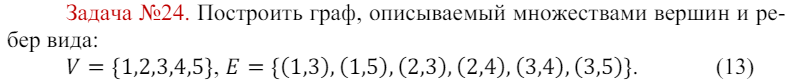

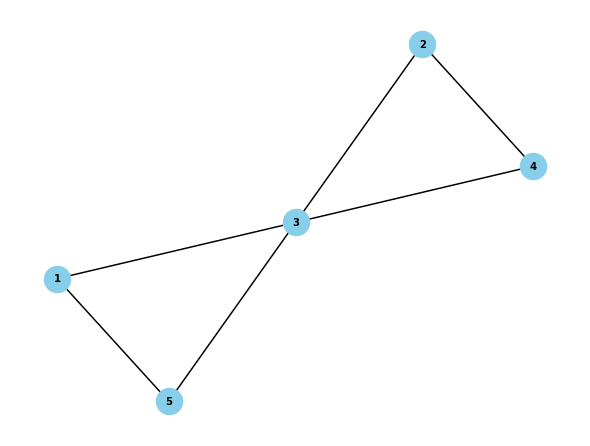

In [8]:
# Определяем пустой граф
G = nx.Graph()

# Определяем количество вершин в графе
nodes = 5
G.add_nodes_from(range(1, nodes + 1))

# Добавляем из списка ребра в граф
edges = [(1, 3), (1, 5), (2, 3), (2, 4), (3, 4), (3, 5)]
G.add_edges_from(edges)

# Рисуем граф
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold', font_size=10, width=1.5)
plt.show()

---
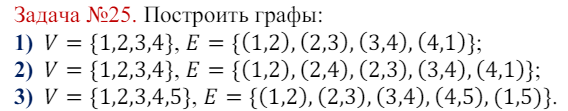

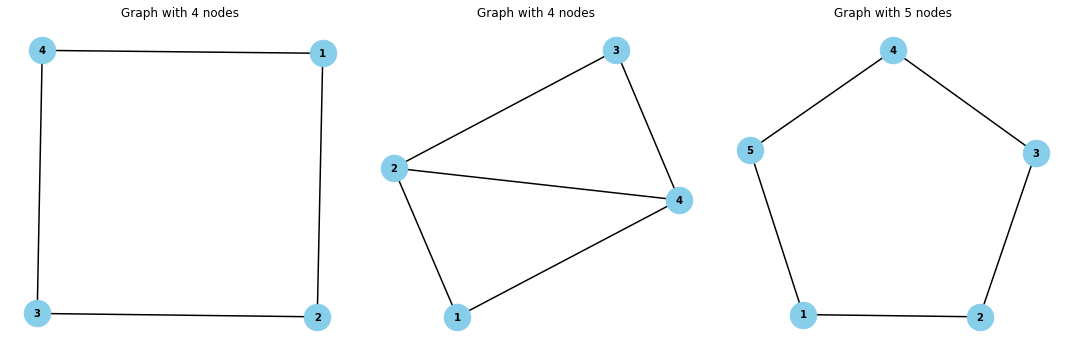

In [39]:
graphs = [
    ([(1, 2), (2, 3), (3, 4), (4, 1)], {1, 2, 3, 4}),
    ([(1, 2), (2, 4), (2, 3), (3, 4), (4, 1)], {1, 2, 3, 4}),
    ([(1, 2), (2, 3), (3, 4), (4, 5), (1, 5)], {1, 2, 3, 4, 5})
]

# Создаем фигуру и оси для трех графиков
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Построение каждого графа
for ax, (edges, nodes) in zip(axes, graphs):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold', font_size=10, width=1.5, ax=ax)
    ax.set_title(f"Graph with {len(nodes)} nodes")

# Отображаем графики
plt.tight_layout()
plt.show()

 Диаграммы графов 1), 2), 3)

---
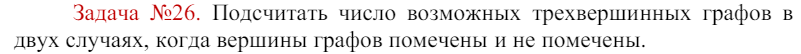

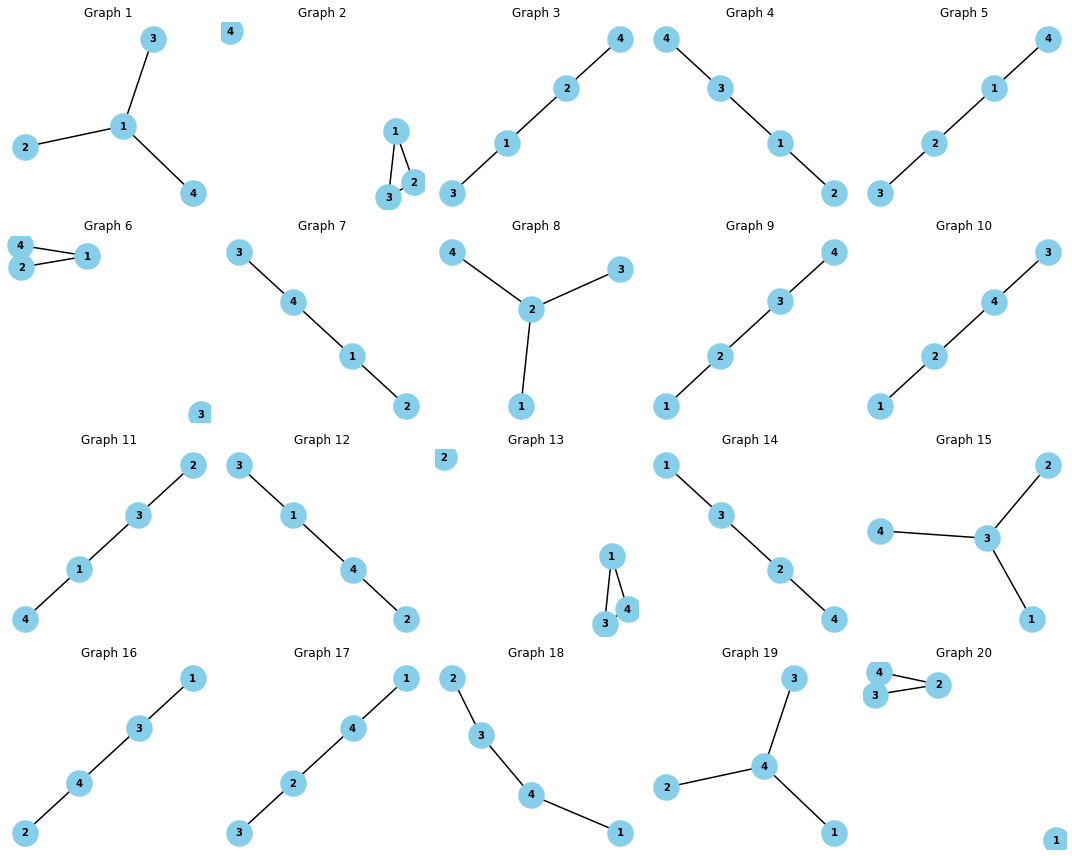

In [64]:
# Определяем все ребра четырехвершинного графа
edges = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

# Перебираем все возможные комбинации трех рёбер из шести
combinations_of_edges = list(combinations(edges, 3))

# Создаем фигуру для отображения всех графов
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.flatten()

# Построение графов
for idx, edge_comb in enumerate(combinations_of_edges):
    G = nx.Graph()
    G.add_nodes_from(range(1, 5))  # Добавляем 4 вершины
    G.add_edges_from(edge_comb)  # Добавляем текущие три рёбра

    # Рисуем текущий граф на соответствующей оси
    nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold', font_size=10, width=1.5, ax=axes[idx])
    axes[idx].set_title(f'Graph {idx + 1}')

# Удаляем лишние оси
for ax in axes[len(combinations_of_edges):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

**Три различных (не изоморфных) графа**,</br>
которые не удается совместить друг с другом никакими перенумерациями вершин и движениями вершин на плоскости.

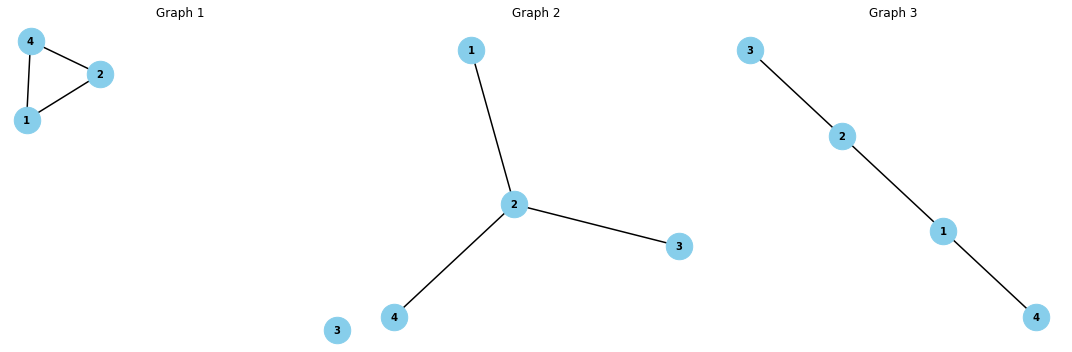

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Построение графов
for idx, edge_comb in enumerate([combinations_of_edges[i]for i in[5,7,4]]):
    G = nx.Graph()
    G.add_nodes_from(range(1, 5))  # Добавляем 4 вершины
    G.add_edges_from(edge_comb)  # Добавляем текущие три рёбра

    # Рисуем текущий граф на соответствующей оси
    nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold', font_size=10, width=1.5, ax=axes[idx])
    axes[idx].set_title(f'Graph {idx + 1}')

# Удаляем лишние оси
for ax in axes[len(combinations_of_edges):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

---
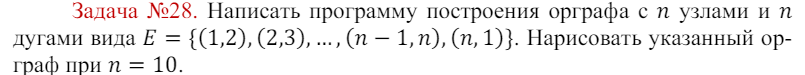

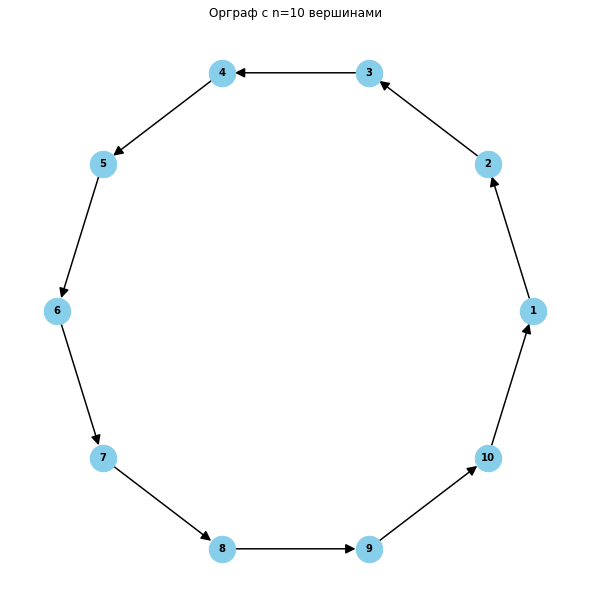

In [102]:
# Определяем количество узлов
n = 10

# Создаем ориентированный граф
G = nx.DiGraph()

# Добавляем узлы
G.add_nodes_from(range(1, n + 1))

# Добавляем дуги вида (i, i+1) и (n, 1)
edges = [(i, i + 1) for i in range(1, n)] + [(n, 1)]
G.add_edges_from(edges)

# Рисуем граф
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold', font_size=10, width=1.5, arrowsize=20)
plt.title("Орграф с n=10 вершинами")
plt.show()

---
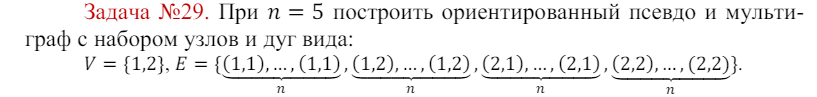

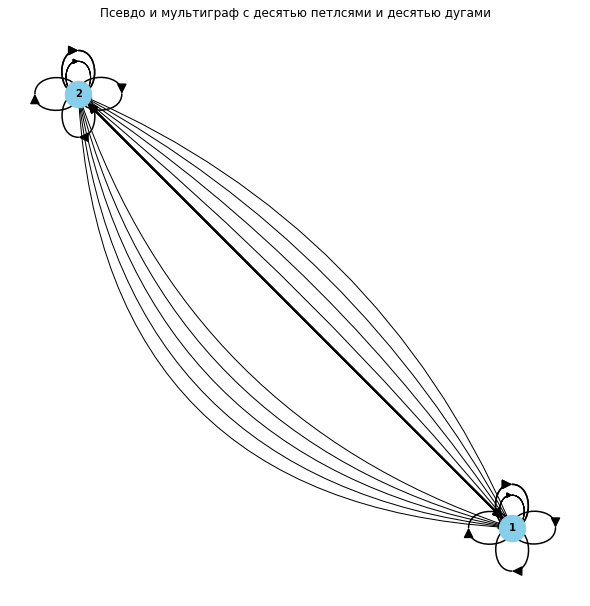

In [266]:
# Определяем количество узлов
n = 5

# Создаем ориентированный мультиграф
G = nx.MultiDiGraph()

# Определяем узлы
nodes = [1, 2]
G.add_nodes_from(nodes)

# Определяем дуги
edges =  [(1, 2)] * n + [(2, 1)] * n  + [(1,1)] * n + [(2,2)] * n
for i, edge in enumerate(edges):
    G.add_edge(edge[0], edge[1], rad=i)



# Рисуем граф

plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold', font_size=10, width=1.5, arrowsize=20)

for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], connectionstyle=f'arc3, rad = {0.05*edge[2]["rad"]}')


#nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold', font_size=10, width=1.5, arrowsize=20, connectionstyle='arc3,rad=0.1')
plt.title("Псевдо и мультиграф с десятью петлсями и десятью дугами")
plt.show()

---
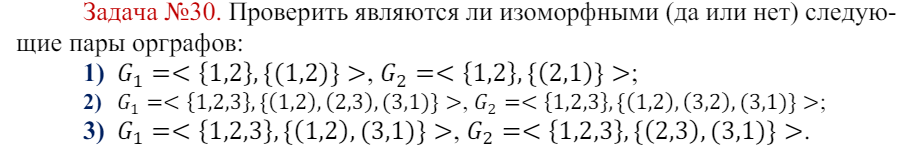

Необходимо **рассмотреть все биекции ℎ** узлов орграфа на себя.</br>

1) 
Всего узлов два, поэтому число биекций две ℎ1 и ℎ2, а именно: </br>
ℎ1(1) = 1, ℎ1(2) = 2 и</br>
**ℎ2(1) = 2, ℎ2(2) = 1.** 

ℎ2 — обеспечивает изоморфизм ℎ2((1,2)) = (ℎ2(1), ℎ2(2)) = (2,1).


**Это означает, что пара орграфов из пункта 1) изоморфны.**

2)
ℎ1(1) = 1, ℎ1(2) = 2, h1(3)= 3 и</br>
ℎ2(1) = 1, ℎ2(2) = 3, h2(3)= 2 и</br>
ℎ3(1) = 2, ℎ3(2) = 1, h3(3)= 3 и</br>
ℎ4(1) = 2, ℎ4(2) = 3, h4(3)= 1 и</br>
ℎ5(1) = 3, ℎ5(2) = 1, h5(3)= 2 и</br>
ℎ6(1) = 3, ℎ6(2) = 2, h6(3)= 1 и</br>

Ни одна биекция изоморфизма не дает.

3)

ℎ1(1) = 1, ℎ1(2) = 2, h1(3)= 3 и</br>
ℎ2(1) = 1, ℎ2(2) = 3, h2(3)= 2 и</br>
ℎ3(1) = 2, ℎ3(2) = 1, h3(3)= 3 и</br>
ℎ4(1) = 2, ℎ4(2) = 3, h4(3)= 1 и</br>
**ℎ5(1) = 3, ℎ5(2) = 1, h5(3)= 2 и</br>**
ℎ6(1) = 3, ℎ6(2) = 2, h6(3)= 1 и</br>

ℎ5 — обеспечивает изоморфизм ℎ5((1,2,3)) = (ℎ5(1), ℎ5(2), ℎ5(3)) = (3,1,2).

**Это означает, что пара орграфов из пункта 3) изоморфны.**


In [268]:
# Функция для создания ориентированного графа из набора вершин и ребер
def create_digraph(nodes, edges):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

# Определяем графы
# Граф 1 для пары 1
G1_1 = create_digraph([1, 2], [(1, 2)])
G1_2 = create_digraph([1, 2], [(2, 1)])

# Граф 2 для пары 2
G2_1 = create_digraph([1, 2, 3], [(1, 2), (2, 3), (3, 1)])
G2_2 = create_digraph([1, 2, 3], [(1, 2), (3, 2), (3, 1)])

# Граф 3 для пары 3
G3_1 = create_digraph([1, 2, 3], [(1, 2), (3, 1)])
G3_2 = create_digraph([1, 2, 3], [(2, 3), (3, 1)])

print(f'Графы G1 и G2 для первой пары изоморфны: {nx.is_isomorphic(G1_1, G1_2)}')
print(f'Графы G1 и G2 для второй пары изоморфны: {nx.is_isomorphic(G2_1, G2_2)}')
print(f'Графы G1 и G2 для третьей пары изоморфны: {nx.is_isomorphic(G3_1, G3_2)}')

Графы G1 и G2 для первой пары изоморфны: True
Графы G1 и G2 для второй пары изоморфны: False
Графы G1 и G2 для третьей пары изоморфны: True


---
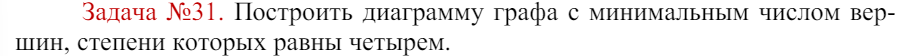

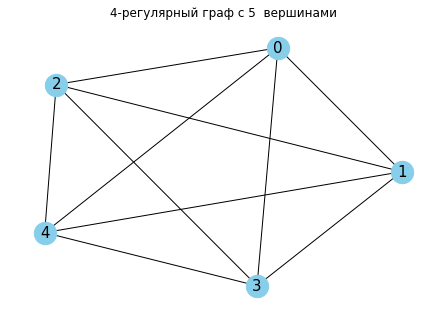

In [278]:
# Создание 4-регулярного графа с 5 вершинами
G = nx.random_regular_graph(4, 5)

# Визуализация графа
pos = nx.spring_layout(G)  # Определяем метод раскладки для лучшего отображения
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=15)

# Отображение графа
plt.title("4-регулярный граф с 5  вершинами")
plt.show()

---
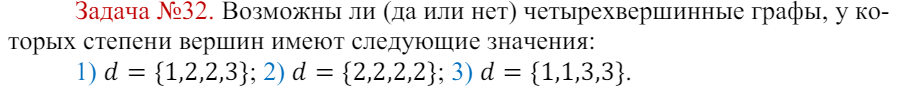
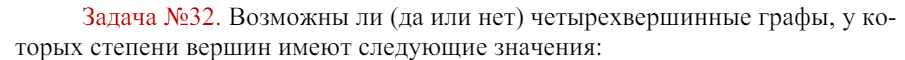

1)
Сумма степеней: 1+2+2+3=8</br>
Сумма четная, что соответствует критерию.</br>
Пример:</br>
**1 - 4**</br>
**|. \\**</br>
**2 - 3**

2)
Сумма степеней: 2+2+2+2=8</br>
Пример:</br>
**1 - 2**</br>
**|.....|**</br>
**4 - 3**

3)
Сумма степеней: 1+1+3+3=8</br>
* Соединяем вершину 1 (степень 3) с вершинами 3 (степень 1), 4 (степень 3) и 2 (степень 1).
* Вершина 2 (степень 1) уже соединена с вершиной 1.
* Вершина 3 (степень 1) уже соединена с вершиной 1.
* Вершина 4 (степень 3) должна быть соединена с вершинами 1 и 2.</br>
Но если мы это сделаем, не получится задействовать вершину 2 корректно, чтобы все степени соблюдались.

**Такой граф невозможен.**

**Ответ: 1) да; 2) да; 3) нет.**



---
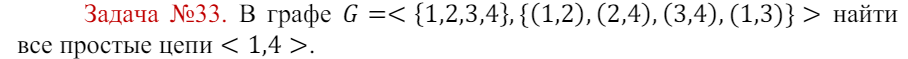

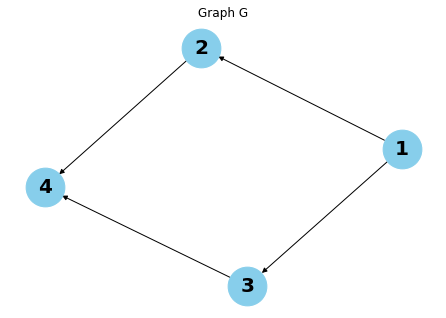

In [280]:
# Создание графа
G = nx.DiGraph()

# Добавление ребер
edges = [(1, 2), (2, 4), (3, 4), (1, 3)]
G.add_edges_from(edges)

# Визуализация графа
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, font_size=20, font_weight='bold')
plt.title("Graph G")
plt.show()

Простые цепи < 1,4 >:</br>
**1) (1,2) -> (2,4)**</br>
**2) (1,3) -> (3,4)**

---
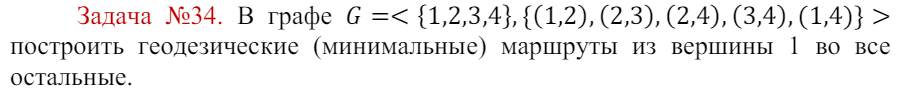

Кратчайший путь из  1 в 2: [1, 2]
Кратчайший путь из  1 в 3: [1, 2, 3]
Кратчайший путь из  1 в 4: [1, 4]


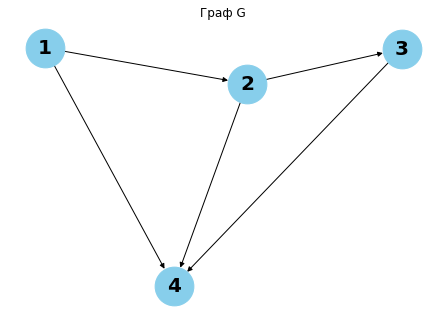

In [302]:
# Создание графа
G = nx.DiGraph()

# Добавление вершин
nodes = [1, 2, 3, 4]
G.add_nodes_from(nodes)

# Добавление ребер
edges = [(1, 2), (2, 3), (2, 4), (3, 4), (1, 4)]
G.add_edges_from(edges)

# Нахождение кратчайших путей из вершины 1 в остальные вершины
shortest_paths = nx.single_source_shortest_path(G, source=1)

# Вывод кратчайших путей
for node in nodes:
    if node != 1:
        shortest_path = shortest_paths[node]
        print(f"Кратчайший путь из  1 в {node}: {shortest_path}")

# Визуализация графа
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, font_size=20, font_weight='bold')
plt.title("Граф G")
plt.show()

---
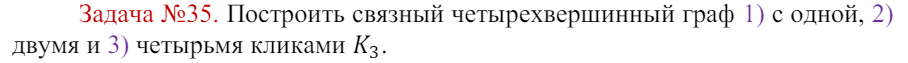

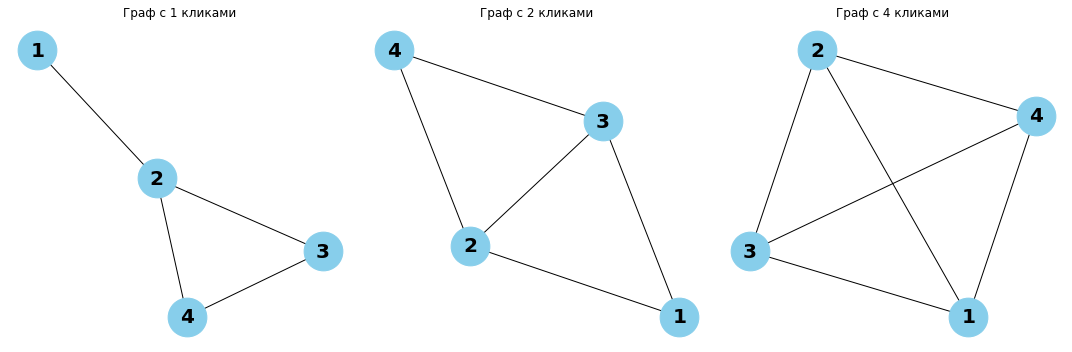

In [319]:
# Создание пустого графа
G = nx.Graph()

# Добавление вершин
nodes = {1, 2, 3, 4}

edges= [[(1, 2), (2, 3), (3, 4), (4,2)],[(1, 2), (1, 3), (3, 4), (2,4),(2,3)],[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]]


# Отображение графа по горизонтали
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, edge, i in zip(axes, edges, [1,2,4]):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edge)
    
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=20, font_weight='bold', ax = ax)
    ax.set_title(f"Граф с {i} кликами")


# Удаляем лишние оси
for ax in axes[len(combinations_of_edges):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

---
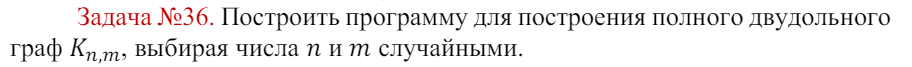

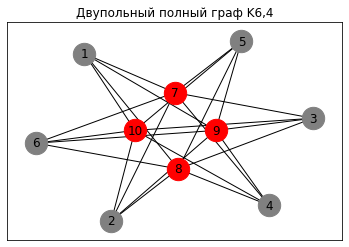

In [364]:
# Определяем число вершин каждой из долей двудольного графа
n = random.randint(3, 6)  # Число вершин в первой доле
m = random.randint(3, 6)  # Число вершин во второй доле

# Создаем граф
G = nx.Graph()

# Вставляем вершины
G.add_nodes_from(range(1, n + m + 1))

# Вставляем ребра двудольного графа
for i in range(1, n + 1):
    for j in range(n + 1, n + m + 1):
        G.add_edge(i, j)

# Рисуем граф
pos = pos=nx.spring_layout(G)
nx.draw_networkx_edges(G,pos, node_size=500)

# Окраска вершин каждой из долей двудольного графа в черный и красный цвета
black_nodes = range(1, n + 1)
red_nodes = range(n + 1, n + m + 1)
nx.draw_networkx_nodes(G, pos, nodelist=black_nodes, node_color='gray', node_size=500)
nx.draw_networkx_nodes(G, pos, nodelist=red_nodes, node_color='red', node_size=500)
nx.draw_networkx_labels(G,pos)

plt.title(f"Двупольный полный граф K{n},{m}")
plt.show()

---
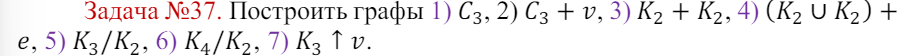

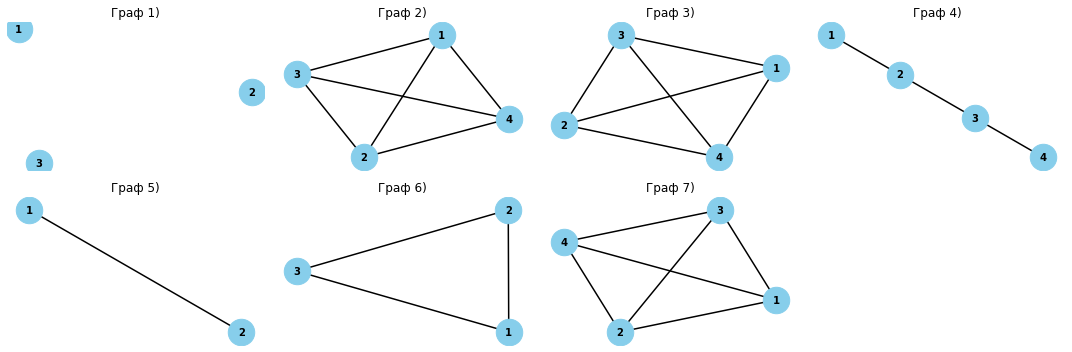

In [379]:
graphs = [
    ([], {1,2,3}),
    ([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)], {1, 2, 3, 4}),
    ([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)], {1, 2, 3, 4}),
    ([(1, 2), (2, 3), (3, 4)], {1, 2, 3, 4}),
    ([(1, 2)], {1, 2}),
    ([(1,2),(2,3),(3,1)], {1, 2, 3}),
    ([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)], {1, 2, 3, 4}),
]

# Создаем фигуру и оси для трех графиков
fig, axes = plt.subplots(2, 4, figsize=(15, 5))
axes = axes.flatten()
# Построение каждого графа
for inx, (edges, nodes) in enumerate( graphs):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    pos = pos=nx.spring_layout(G)
    nx.draw(G,pos, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold', font_size=10, width=1.5, ax=axes[inx])
    axes[inx].set_title(f"Граф {inx+1})")

# Удаляем лишние оси
for ax in axes[len(combinations_of_edges):]:
    fig.delaxes(ax)


fig.delaxes(axes[7])
plt.tight_layout()
plt.show()

---
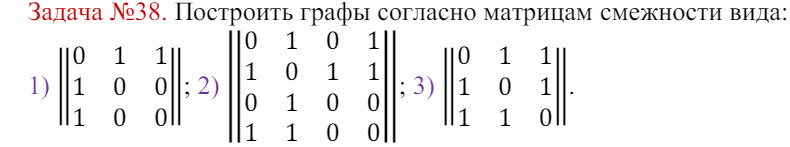

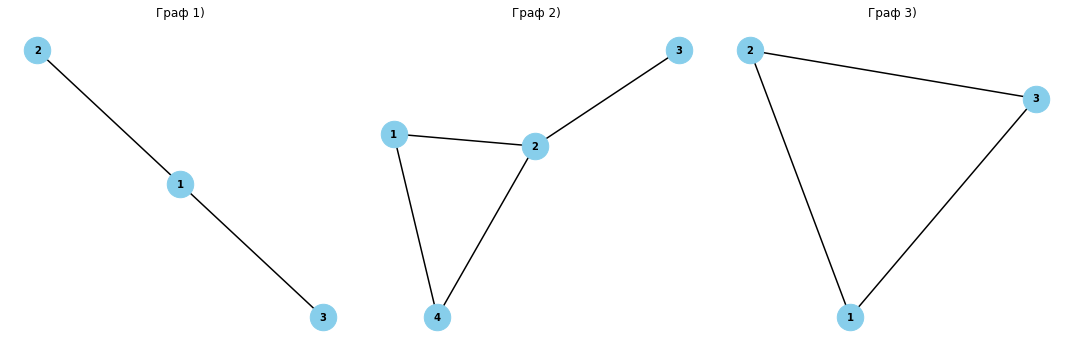

In [415]:
graphs = [
    ([(3,1),(1,2)], {1, 2, 3}),
    ([(3,2),(2,1),(2,4),(4,1)], {1, 2, 3}),
    ([(1,2),(2,3),(3,1)], {1, 2, 3})
]

# Создаем фигуру и оси для трех графиков
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
# Построение каждого графа
for inx, (edges, nodes) in enumerate( graphs):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    pos =nx.spring_layout(G)
    nx.draw(G,pos, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold', font_size=10, width=1.5, ax=axes[inx])
    axes[inx].set_title(f"Граф {inx+1})")

# Удаляем лишние оси
for ax in axes[len(combinations_of_edges):]:
    fig.delaxes(ax)


plt.tight_layout()
plt.show()

---
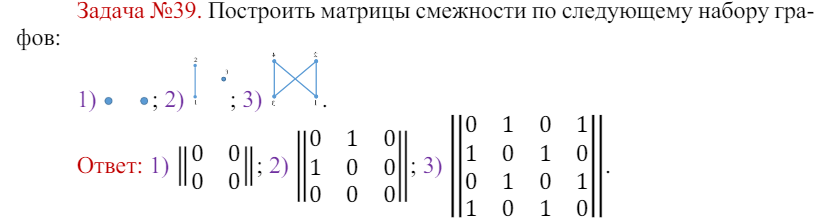

---
### Задача 40
---
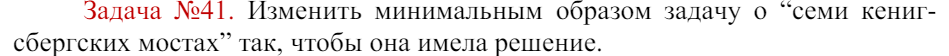

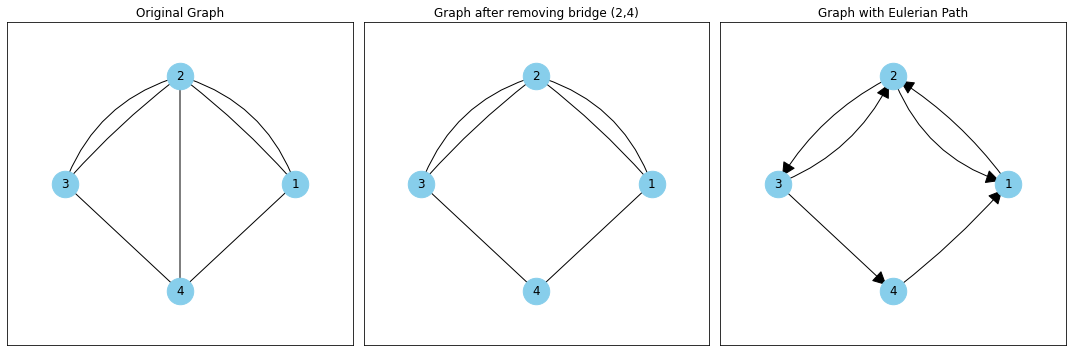

In [471]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Строим граф о семи кенигсбергских мостах
G = nx.DiGraph()

# Вставляем четыре вершины
G.add_nodes_from([1, 2, 3, 4])

# Вставляем ребра графа, описывающие семь кёнигсбергских мостов
edges = [(1, 2, 1),(2, 1,-5), (2, 3,1), (3, 2,-5),(1, 4,0), (3, 4,0), (2, 4,0)]
for edge in edges:
    G.add_edge(edge[0], edge[1], rad = edge[2])

# Рисуем граф задачи о семи кенигсбергских мостах
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Первый подграф
axes[0].set_title("Original Graph")

pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', ax= axes[0])
nx.draw_networkx_labels(G,pos, ax= axes[0])
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])],arrowsize=1, connectionstyle=f'arc3, rad = {0.05*edge[2]["rad"]}', ax= axes[0])
axes[0].set_xlim(-1.5, 1.5)
axes[0].set_ylim(-1.5, 1.5)

# Окрашиваем мост (2,4) красным цветом
G.remove_edge(2, 4)
axes[1].set_title("Graph after removing bridge (2,4)")
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', ax= axes[1])

for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])],arrowsize=1, connectionstyle=f'arc3, rad = {0.05*edge[2]["rad"]}', ax= axes[1])
nx.draw_networkx_labels(G,pos, ax= axes[1])
axes[1].set_xlim(-1.5, 1.5)
axes[1].set_ylim(-1.5, 1.5)

# Строим ориентированный граф по прокладке эйлерова пути
G_euler = nx.DiGraph()

# Вставляем четыре вершины
G_euler.add_nodes_from([1, 2, 3, 4])

# Вставляем ребра графа, описывающие прокладку эйлерова пути
edges_euler = [(3, 4), (4, 1), (1, 2), (2, 3), (3, 2), (2, 1)]
for i, edge in enumerate(edges_euler):
    G_euler.add_edge(edge[0], edge[1], rad = i)

axes[2].set_title("Graph with Eulerian Path")
nx.draw_networkx_nodes(G_euler, pos, node_size=700, node_color='skyblue', ax= axes[2])
for edge in G_euler.edges(data=True):
    nx.draw_networkx_edges(G_euler, pos, edgelist=[(edge[0],edge[1])],arrowsize=30, connectionstyle=f'arc3, rad = {0.05*edge[2]["rad"]}', ax= axes[2])
nx.draw_networkx_labels(G_euler,pos, ax= axes[2])
axes[2].set_xlim(-1.5, 1.5)
axes[2].set_ylim(-1.5, 1.5)

# Отображение
plt.tight_layout()
plt.show()


C:\Users\golev\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


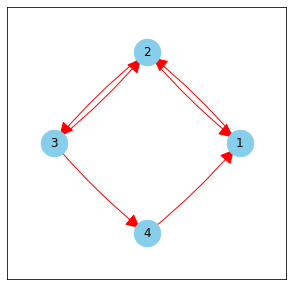

In [477]:
# С помощью анимации построим эйлеров путь в графе без моста (2,4)
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title("Eulerian Path in Graph without Bridge (2,4)")

def animate(i):
    if i < len(edges_euler):
        ax.clear()
        nx.draw_networkx_nodes(G_euler, pos, node_size=700, node_color='skyblue')
        nx.draw_networkx_labels(G_euler,pos)
        nx.draw_networkx_edges(G_euler,pos, edgelist=edges_euler[:i+1],arrowsize=30, edge_color='r', ax=ax, connectionstyle=f'arc3, rad = {0.05*edge[2]["rad"]}',)
        ax.set_xlim(-1.5, 1.5)
        ax.set_ylim(-1.5, 1.5)

ani = FuncAnimation(fig, animate, frames=len(edges_euler), interval=1000)
HTML(ani.to_jshtml())